## Notebook to develop the PEA/OSS strategy

In [1]:
from ib_async import *
import pandas as pd
import numpy as np
from datetime import datetime, time, timedelta
import yfinance as yf
from broker.connection import connect_to_IB
from broker.riskmanager import RiskManager
from data_and_research import ac
import broker.utilityfunctions as uf
import asyncio

Connected to ArcticDB at ../db


### Connection to IB and ArcticDB

In [15]:
ib = connect_to_IB(clientid=0)
lib = ac.get_library('univ')
univ = lib.read('us_equities').data

self = RiskManager(ib)



API connection failed: ConnectionRefusedError(61, "Connect call failed ('127.0.0.1', 7497)")


In [5]:
earnings = uf.get_earnings()
    
earnings
### Calculate the current short Put option exposure 

symbol        date                when
0      AAP  2024-11-14  Before market open
1     AEMD  2024-11-13  After market close
2     AFMD  2024-11-14  Before market open
3     AGRO  2024-11-13  After market close
4     ALVO  2024-11-13  After market close
..     ...         ...                 ...
115    WYY  2024-11-13  After market close
116   XNET  2024-11-14  Before market open
117    XOS  2024-11-13  After market close
118   ZCAR  2024-11-14  Before market open
119     ZK  2024-11-14  Before market open

[120 rows x 3 columns]

In [6]:
voldf = uf.get_vol_data(earnings.symbol.tolist())
voldf


Looking up vol data for: 2024-11-13


act_symbol        date  hv_current  iv_current  vol_premium       close
9        SONO  2024-11-13      0.3504      0.7648     2.182648   14.490000
3         DIS  2024-11-13      0.1858      0.3671     1.975780  111.759903
1        CSCO  2024-11-13      0.1765      0.2871     1.626629   58.420101
2        DGII  2024-11-13      0.3792      0.5447     1.436445   33.299999
8         SBH  2024-11-13      0.3725      0.5268     1.414228   13.770000
6        JJSF  2024-11-13      0.2167      0.2954     1.363175  172.589996
10       TTEK  2024-11-13      0.3296      0.4313     1.308556   43.660000
5          HP  2024-11-13      0.3802      0.4445     1.169122   33.930000
7        KLIC  2024-11-13      0.3723      0.3900     1.047542   47.080002
4          HI  2024-11-13      0.4704      0.4154     0.883078   34.880001
0         AAP  2024-11-13      0.4247         NaN          NaN   44.639999

In [16]:
symbols = voldf[voldf['vol_premium'] > 1]['act_symbol'].tolist()
symbols


['SBSI',
 'HAS',
 'FCN',
 'SEIC',
 'FCFS',
 'SLP',
 'PI',
 'CHDN',
 'ALLE',
 'TYL',
 'ORLY',
 'IBM',
 'SMPL',
 'WST',
 'VIRT',
 'ASGN',
 'KDP',
 'WNC',
 'GBX',
 'VLTO',
 'MCRI',
 'EPRT',
 'WEX',
 'CARR',
 'NDAQ',
 'AMP',
 'URI',
 'GGG',
 'ALGN',
 'CACI',
 'EEFT',
 'ROL',
 'CBRE',
 'UPS',
 'LH',
 'MC',
 'ITGR',
 'KALU',
 'SPGI',
 'MAT',
 'NOC',
 'CASH',
 'WU',
 'HON',
 'POOL',
 'LKQ',
 'CRS',
 'TXT',
 'R',
 'OSIS',
 'DTE',
 'COLB',
 'ORI',
 'NTCT',
 'NOW',
 'TSCO',
 'TMUS',
 'VC',
 'SLM',
 'DOV',
 'RS',
 'NEM',
 'PLXS',
 'MXL',
 'TER',
 'WHR',
 'BFH',
 'LNN',
 'UNP',
 'RJF',
 'CVBF',
 'MSM',
 'HLX',
 'BC',
 'AIT',
 'LEA',
 'NEU',
 'GL',
 'LUV',
 'VLY',
 'OII',
 'MORN',
 'WH',
 'AAL',
 'HOG',
 'TSLA',
 'TPH',
 'PTEN',
 'CNX',
 'KNX',
 'MSA',
 'STC',
 'SAH',
 'EGP',
 'CLB',
 'NLY',
 'MOH',
 'LRCX',
 'SSB',
 'LVS',
 'CCS',
 'VLO',
 'RES',
 'DOW']

In [13]:
len(symbols)

104

In [23]:
df = uf.pea_oss(ib,symbols=symbols[30:40])

Unknown contract: Option(symbol='CBRE', lastTradeDateOrContractMonth='20241220', strike=165.0, right='P', exchange='SMART')
Unknown contract: Option(symbol='SPGI', lastTradeDateOrContractMonth='20241025', strike=497.5, right='P', exchange='SMART')
Unknown contract: Option(symbol='SPGI', lastTradeDateOrContractMonth='20241108', strike=595.0, right='P', exchange='SMART')
Unknown contract: Option(symbol='SPGI', lastTradeDateOrContractMonth='20241108', strike=605.0, right='P', exchange='SMART')
Unknown contract: Option(symbol='SPGI', lastTradeDateOrContractMonth='20241115', strike=375.0, right='P', exchange='SMART')
Unknown contract: Option(symbol='SPGI', lastTradeDateOrContractMonth='20241115', strike=385.0, right='P', exchange='SMART')
Unknown contract: Option(symbol='SPGI', lastTradeDateOrContractMonth='20241115', strike=395.0, right='P', exchange='SMART')
Unknown contract: Option(symbol='SPGI', lastTradeDateOrContractMonth='20241115', strike=405.0, right='P', exchange='SMART')
Unknown 

In [24]:
df[df.BidSize > 0]

Symbol  StockPrice  Strike  Expiration  DTE   Bid  BidSize   Ask  AskSize  \
260    UPS      138.21   131.0  2024-11-22   29  1.48    395.0  2.67    686.0   
298    UPS      138.21   131.0  2024-11-29   36  1.64    313.0  2.17    353.0   
297    UPS      138.21   130.0  2024-11-29   36  1.36   1222.0  1.66     52.0   
352    UPS      138.21   130.0  2024-12-20   57  2.13   1508.0  2.37   1151.0   

     Last                                           Contract   Premium  \
260  5.82  Option(conId=733301112, symbol='UPS', lastTrad...  0.011298   
298  6.25  Option(conId=734600992, symbol='UPS', lastTrad...  0.012519   
297  5.79  Option(conId=734600956, symbol='UPS', lastTrad...  0.010462   
352  6.07  Option(conId=736221280, symbol='UPS', lastTrad...  0.016385   

     Annualized Premium  Safety Margin in %  
260            0.142195            0.052167  
298            0.126930            0.052167  
297            0.106068            0.059402  
352            0.104919            0.059402

In [35]:
df['indicator'] = df['Annualized Premium'] / df['Safety Margin in %']
df.sort_values(by='indicator', ascending=False)

Symbol  StockPrice  Strike  Expiration  DTE   Bid  BidSize   Ask  \
375    ERIC       8.565     8.0  2024-10-18    3 -1.00      0.0  0.05   
383     FBK      49.080    45.0  2024-10-18    3 -1.00      0.0  1.75   
1514    WBA      10.150     8.0  2024-10-18    3 -1.00      0.0  0.01   
936    MBWM      45.560    40.0  2024-10-18    3 -1.00      0.0  4.10   
374    ERIC       8.565     7.0  2024-10-18    3 -1.00      0.0  0.05   
1527    WBA      10.150     9.5  2024-10-25   10  0.15   1176.0  0.17   
1537    WBA      10.150     9.5  2024-11-01   17  0.21   4424.0  0.25   
1559    WBA      10.150     9.5  2024-11-22   38  0.46    727.0  0.50   
1547    WBA      10.150     9.5  2024-11-08   24  0.29    792.0  0.32   
1569    WBA      10.150     9.5  2024-11-29   45  0.49    732.0  0.53   
13      ACI      18.500    17.0  2024-11-15   31  0.45    132.0  0.60   
1046    PNC     195.930   185.0  2024-11-08   24  1.90    123.0  2.10   
1065    PNC     195.930   185.0  2024-11-15   31  2.45    223.0  2.60   
1558    WBA      10.150     9.0  2024-11-22   38  0.29    841.0  0.33   
1568    WBA      10.150     9.0  2024-11-29   45  0.34      2.0  0.38   
290       C      63.025    59.0  2024-11-08   24  0.62    114.0  0.66   
1390    UNH     561.750   530.0  2024-11-15   31  6.25    404.0  6.65   
1080    PNC     195.930   185.0  2024-11-22   38  2.60    235.0  2.95   
1546    WBA      10.150     9.0  2024-11-08   24  0.16   2026.0  0.18   
1099    PNC     195.930   185.0  2024-11-29   45  2.85     64.0  3.20   
379    ERIC       8.565     8.0  2024-11-15   31  0.10    100.0  0.15   
632      GS     524.990   495.0  2024-11-15   31  5.30    551.0  5.50   
1429    UNH     561.750   530.0  2024-11-22   38  6.85    153.0  7.60   
329       C      63.025    59.0  2024-11-22   38  0.86   1775.0  0.98   
1536    WBA      10.150     9.0  2024-11-01   17  0.10   3368.0  0.13   
682      GS     524.990   495.0  2024-11-22   38  6.05     68.0  6.40   
1482    UNH     561.750   530.0  2024-11-29   45  7.40    246.0  8.20   
356       C      63.025    59.0  2024-11-29   45  0.93     88.0  1.15   
725      GS     524.990   495.0  2024-11-29   45  6.70    160.0  7.10   
1428    UNH     561.750   525.0  2024-11-22   38  5.85    160.0  6.45   
1481    UNH     561.750   525.0  2024-11-29   45  6.60     35.0  7.20   
378    ERIC       8.565     7.0  2024-11-15   31 -1.00      0.0  0.05   
328       C      63.025    58.0  2024-11-22   38  0.65   2778.0  0.75   
1557    WBA      10.150     8.5  2024-11-22   38  0.18   3548.0  0.21   
1567    WBA      10.150     8.5  2024-11-29   45  0.21    818.0  0.26   
387     FBK      49.080    40.0  2024-11-15   31 -1.00      0.0  4.80   
1545    WBA      10.150     8.5  2024-11-08   24  0.09    999.0  0.11   
940    MBWM      45.560    35.0  2024-11-15   31 -1.00      0.0  1.30   
1566    WBA      10.150     8.0  2024-11-29   45  0.14    392.0  0.18   
1556    WBA      10.150     8.0  2024-11-22   38  0.11   1927.0  0.14   

      AskSize  Last                                           Contract  \
375    7585.0  0.58  Option(conId=684521248, symbol='ERIC', lastTra...   
383      96.0  1.58  Option(conId=684579918, symbol='FBK', lastTrad...   
1514     12.0  0.22  Option(conId=730787090, symbol='WBA', lastTrad...   
936     208.0  0.48  Option(conId=723115113, symbol='MBWM', lastTra...   
374   11963.0  0.10  Option(conId=684521169, symbol='ERIC', lastTra...   
1527   2701.0  1.00  Option(conId=727108853, symbol='WBA', lastTrad...   
1537   5451.0  0.91  Option(conId=728315381, symbol='WBA', lastTrad...   
1559   3574.0  1.31  Option(conId=733333987, symbol='WBA', lastTrad...   
1547   1488.0  1.17  Option(conId=731983352, symbol='WBA', lastTrad...   
1569     55.0  1.17  Option(conId=734612931, symbol='WBA', lastTrad...   
13      100.0  0.65  Option(conId=709262706, symbol='ACI', lastTrad...   
1046     32.0  5.25  Option(conId=731915691, symbol='PNC', lastTrad...   
1065    233.0  5.45  Option(conId=690915590, symb

### Calculate the current short Put option exposure 

In [3]:
short_put_df, exposure = await self.get_short_put_exposure_async(exclude_ETFs=True)

Requesting price for AMD
Requesting price for APLD
Requesting price for APOG
Requesting price for C
Requesting price for CALM
Requesting price for DAL
Requesting price for DPZ
Requesting price for HELE
Requesting price for JPM
Requesting price for MMYT
Requesting price for PLTR
Ticker(contract=Stock(conId=444857009, symbol='PLTR', exchange='SMART', primaryExchange='NYSE', currency='USD', localSymbol='PLTR', tradingClass='PLTR'), time=datetime.datetime(2024, 10, 15, 10, 53, 15, 784823, tzinfo=datetime.timezone.utc), minTick=0.0001, bid=43.33, bidSize=2.0, ask=43.35, askSize=81.0, last=43.34, lastSize=2.0, volume=1486.0, close=43.4, halted=0.0, bboExchange='a60001', snapshotPermissions=3)
Ticker(contract=Stock(conId=77879741, symbol='MMYT', exchange='SMART', primaryExchange='ISLAND', currency='USD', localSymbol='MMYT', tradingClass='NMS'), time=datetime.datetime(2024, 10, 15, 10, 53, 15, 962531, tzinfo=datetime.timezone.utc), minTick=0.01, bid=102.11, bidSize=1.0, ask=104.5, askSize=3.0,

### Get the long Put / hedge exposure

In [22]:
async def fetch_price_async(ib, contract):
    print(f"Requesting price for {contract.symbol}")
    ib.qualifyContracts(contract)
    [ticker] = await ib.reqTickersAsync(contract)
    print(f"{ticker}")
    price = ticker.marketPrice() if ticker.marketPrice() is not None else ticker.close
    return contract.symbol, price

async def get_long_put_exposure(self):
    self.portfolio = self.get_portfolio_data()

    put_option_rows = [row for _, row in self.portfolio.iterrows() if row['contract'].right == 'P' and np.sign(row['position']) == 1]
    long_put_df = pd.DataFrame(put_option_rows)

    def get_sector(symbol, source='yf' or 'universe'):
        if source == 'yf':
            info = yf.Ticker(symbol).info
            try:
                sector = info['sector']
                return sector
            except KeyError:
                return None
        elif source == 'universe':
            if symbol in univ['Symbol'].values:
                sector = univ.loc[univ['Symbol'] == symbol, 'Sector'].values[0]
                return sector
            else:
                return None

    long_put_df['sector'] = short_put_df['symbol'].apply(lambda x: get_sector(x, source='universe'))

    contracts = [Stock(symbol, 'SMART', 'USD') for symbol in long_put_df['symbol'].unique()]
    tasks = [fetch_price_async(self.ib, con) for con in contracts]
    prices = await asyncio.gather(*tasks)

    prices_dict = dict(prices)
    long_put_df['underlying_price'] = long_put_df['symbol'].map(prices_dict)
    long_put_df['strike'] = long_put_df['contract'].apply(lambda x: x.strike)
    long_put_df['Hedged Exposure'] = abs(long_put_df['position']) * long_put_df['strike'] * 100
    long_put_df['Out of Moneyness'] = (long_put_df['strike'] / long_put_df['underlying_price']) -1
    # exclude all options that are not more than 20% OTM
    long_put_df = long_put_df[long_put_df['Out of Moneyness'] > -0.2]
    self.long_put_df = long_put_df[['contract', 'symbol', 'sector', 'strike', 'underlying_price', 'position', 'marketValue', 'averageCost', 'Hedged Exposure', 'Out of Moneyness']]
    return self.long_put_df, {'Hedged Exposure': self.long_put_df['Hedged Exposure'].sum(), 'Out of Moneyness': self.long_put_df['Out of Moneyness'].mean()}



In [23]:
long_put_df, summary = await get_long_put_exposure(self=self)

Requesting price for PTON
Requesting price for QQQ
Requesting price for SPY
Ticker(contract=Stock(conId=756733, symbol='SPY', exchange='SMART', primaryExchange='ARCA', currency='USD', localSymbol='SPY', tradingClass='SPY'), time=datetime.datetime(2024, 10, 15, 11, 13, 7, 321515, tzinfo=datetime.timezone.utc), minTick=0.01, bid=584.28, bidSize=17.0, ask=584.31, askSize=26.0, last=584.29, lastSize=7.0, volume=1514.0, close=584.32, halted=0.0, bboExchange='a60001', snapshotPermissions=3)
Ticker(contract=Stock(conId=320227571, symbol='QQQ', exchange='SMART', primaryExchange='ISLAND', currency='USD', localSymbol='QQQ', tradingClass='NMS'), time=datetime.datetime(2024, 10, 15, 11, 13, 7, 411640, tzinfo=datetime.timezone.utc), minTick=0.01, bid=497.24, bidSize=1.0, ask=497.29, askSize=8.0, last=497.26, lastSize=2.0, volume=1611.0, close=497.5, halted=0.0, bboExchange='9c0001', snapshotPermissions=3)
Ticker(contract=Stock(conId=385087203, symbol='PTON', exchange='SMART', primaryExchange='ISLAN

In [25]:
long_put_df
summary


{'Hedged Exposure': 104700.0, 'Out of Moneyness': -0.0321508409753834}

In [13]:
long_put_df

contract symbol sector  strike  \
32  Option(conId=684774854, symbol='PTON', lastTra...   PTON    NaN     2.0   
34  Option(conId=728286475, symbol='QQQ', lastTrad...    QQQ    NaN   480.0   
38  Option(conId=734599576, symbol='SPY', lastTrad...    SPY    NaN   567.0   

    underlying_price  position  marketValue  averageCost  Hedged Exposure  \
32             5.505       1.0         0.00      14.7969            200.0   
34           497.490       1.0       275.34     469.0530          48000.0   
38           584.480       1.0        86.00     300.4530          56700.0   

    Out of Moneyness  
32         -0.636694  
34         -0.035156  
38         -0.029907

In [3]:
# Initiate the RiskManager class and get the portfolio data
self = RiskManager(ib)
# short_put_df, exposure = self.get_short_put_exposure(exclude_ETFs=True)

# print(exposure)


Requesting price for AMD
Requesting price for APLD
Requesting price for APOG
Requesting price for C
Requesting price for CALM
Requesting price for DAL
Requesting price for DPZ
Requesting price for HELE
Requesting price for JPM
Requesting price for MMYT
Requesting price for PLTR
Ticker(contract=Stock(conId=444857009, symbol='PLTR', exchange='SMART', primaryExchange='NYSE', currency='USD', localSymbol='PLTR', tradingClass='PLTR'), time=datetime.datetime(2024, 10, 15, 10, 39, 30, 163175, tzinfo=datetime.timezone.utc), minTick=0.0001, bid=43.28, bidSize=1.0, ask=43.3, askSize=9.0, last=43.29, lastSize=1.0, volume=1452.0, close=43.4, halted=0.0, bboExchange='a60001', snapshotPermissions=3)
Ticker(contract=Stock(conId=77879741, symbol='MMYT', exchange='SMART', primaryExchange='ISLAND', currency='USD', localSymbol='MMYT', tradingClass='NMS'), time=datetime.datetime(2024, 10, 15, 10, 39, 30, 342471, tzinfo=datetime.timezone.utc), minTick=0.01, bid=102.11, bidSize=1.0, ask=104.5, askSize=3.0, l

In [7]:
import asyncio

async def fetch_price_async(ib, contract):
    print(f"Requesting price for {contract.symbol}")
    ib.qualifyContracts(contract)
    [ticker] = await ib.reqTickersAsync(contract)
    print(f"{ticker}")
    price = ticker.marketPrice() if ticker.marketPrice() is not None else ticker.close
    return contract.symbol, price

async def get_short_put_exposure_async(self, exclude_ETFs=True):
    self.portfolio = self.get_portfolio_data()

    put_option_rows = [row for _, row in self.portfolio.iterrows() if row['contract'].right == 'P' and np.sign(row['position']) == -1]
    short_put_df = pd.DataFrame(put_option_rows)

    def get_sector(symbol, source='yf' or 'universe'):
        if source == 'yf':
            info = yf.Ticker(symbol).info
            try:
                sector = info['sector']
                return sector
            except KeyError:
                return None
        elif source == 'universe':
            if symbol in univ['Symbol'].values:
                sector = univ.loc[univ['Symbol'] == symbol, 'Sector'].values[0]
                return sector
            else:
                return None

    short_put_df['sector'] = short_put_df['symbol'].apply(lambda x: get_sector(x, source='universe'))

    if exclude_ETFs:
        short_put_df = short_put_df[short_put_df['sector'].notna()].reset_index(drop=True)

    contracts = [Stock(symbol, 'SMART', 'USD') for symbol in short_put_df['symbol'].unique()]
    tasks = [fetch_price_async(self.ib, con) for con in contracts]
    prices = await asyncio.gather(*tasks)

    prices_dict = dict(prices)
    short_put_df['stockprice'] = short_put_df['symbol'].map(prices_dict)
    short_put_df['strike'] = short_put_df['contract'].apply(lambda x: x.strike)
    short_put_df['exposure_level1'] = abs(short_put_df['position']) * short_put_df['strike'] * 100
    short_put_df['exposure_level2'] = np.where(short_put_df['strike'] >= short_put_df['stockprice'] * 0.95, short_put_df['exposure_level1'], 0)
    short_put_df['expected_dollar_return'] = np.where(short_put_df['strike'] <= short_put_df['stockprice'], abs(short_put_df['marketValue']), short_put_df['marketValue'] + (short_put_df['averageCost']))

    self.short_put_df = short_put_df[['contract', 'symbol', 'sector', 'strike', 'stockprice', 'position', 'marketValue', 'averageCost', 'exposure_level1', 'exposure_level2', 'expected_dollar_return']]
    return self.short_put_df, {'Total Exposure': self.short_put_df.exposure_level1.sum(), 'Total Exposure at Risk': self.short_put_df.exposure_level2.sum(), 'Total Expected Dollar Return': self.short_put_df.expected_dollar_return.sum()}

# Usage:
df, exposure = await get_short_put_exposure(self=self, exclude_ETFs=True)

Requesting price for AMD
Requesting price for APLD
Requesting price for APOG
Requesting price for C
Requesting price for CALM
Requesting price for DAL
Requesting price for DPZ
Requesting price for HELE
Requesting price for JPM
Requesting price for MMYT
Requesting price for PLTR
Ticker(contract=Stock(conId=444857009, symbol='PLTR', exchange='SMART', primaryExchange='NYSE', currency='USD', localSymbol='PLTR', tradingClass='PLTR'), time=datetime.datetime(2024, 10, 15, 10, 45, 0, 17092, tzinfo=datetime.timezone.utc), minTick=0.0001, bid=43.3, bidSize=7.0, ask=43.31, askSize=2.0, last=43.31, lastSize=1.0, volume=1461.0, close=43.4, halted=0.0, bboExchange='a60001', snapshotPermissions=3)
Ticker(contract=Stock(conId=77879741, symbol='MMYT', exchange='SMART', primaryExchange='ISLAND', currency='USD', localSymbol='MMYT', tradingClass='NMS'), time=datetime.datetime(2024, 10, 15, 10, 45, 0, 199139, tzinfo=datetime.timezone.utc), minTick=0.01, bid=102.11, bidSize=1.0, ask=104.5, askSize=3.0, last

In [5]:
df

contract symbol  \
0   Option(conId=726994679, symbol='AMD', lastTrad...    AMD   
1   Option(conId=683238380, symbol='AMD', lastTrad...    AMD   
2   Option(conId=677363535, symbol='AMD', lastTrad...    AMD   
3   Option(conId=731843018, symbol='APLD', lastTra...   APLD   
4   Option(conId=722778122, symbol='APOG', lastTra...   APOG   
5   Option(conId=734474881, symbol='C', lastTradeD...      C   
6   Option(conId=690655193, symbol='CALM', lastTra...   CALM   
7   Option(conId=731862634, symbol='DAL', lastTrad...    DAL   
8   Option(conId=733212146, symbol='DPZ', lastTrad...    DPZ   
9   Option(conId=693424056, symbol='HELE', lastTra...   HELE   
10  Option(conId=727044679, symbol='JPM', lastTrad...    JPM   
11  Option(conId=723115522, symbol='MMYT', lastTra...   MMYT   
12  Option(conId=722320129, symbol='PLTR', lastTra...   PLTR   

                    sector  strike  stockprice  position  marketValue  \
0    Electronic technology   135.0     163.180      -1.0       -12.48   
1    Electronic technology   185.0     163.180      -1.0     -2434.26   
2    Electronic technology   100.0     163.180      -2.0       -59.87   
3      Technology services     5.5       7.500      -1.0       -20.83   
4   Producer manufacturing    80.0      55.595      -1.0      -145.98   
5                  Finance    60.0      66.275      -1.0       -78.98   
6       Process industries    70.0      88.500      -1.0       -12.08   
7           Transportation    45.0      53.740      -2.0       -24.17   
8        Consumer services   385.0     418.250      -1.0      -140.23   
9        Consumer durables    60.0      64.045      -2.0      -158.34   
10                 Finance   215.0     221.500      -1.0       -85.95   
11     Technology services    85.0     103.010      -1.0        -1.14   
12     Technology services    43.0      43.290      -1.0       -69.95   

    averageCost  exposure_level1  exposure_level2  expected_dollar_return  
0     149.93970          13500.0              0.0                 12.4800  
1    2204.13260          18500.0          18500.0               -230.1274  
2     115.29715          20000.0              0.0                 59.8700  
3      34.94330            550.0              0.0                 20.8300  
4     179.93690           8000.0           8000.0                 33.9569  
5      76.36210           6000.0              0.0                 78.9800  
6      99.93910           7000.0              0.0                 12.0800  
7      44.69300           9000.0              0.0                 24.1700  
8     406.93290          38500.0              0.0                140.2300  
9      81.34200          12000.0              0.0                158.3400  
10    133.19050          21500.0          21500.0                 85.9500  
11    133.94010           8500.0              0.0                  1.1400  
12     55.42270           4300.0           4300.0                 69.9500

In [12]:
def get_short_put_exposure(self,exclude_ETFs=True):
    self.portfolio = self.get_portfolio_data()

    put_option_rows = [row for _,row in self.portfolio.iterrows() if row['contract'].right == 'P' and np.sign(row['position']) == -1]
    short_put_df = pd.DataFrame(put_option_rows)

    def get_sector(symbol, source='yf' or 'universe'):
        if source == 'yf':
            info = yf.Ticker(symbol).info
            try:
                sector = info['sector']
                return sector
            except KeyError:
                return None
        elif source == 'universe':
            # Check if the symbol exists in the DataFrame
            if symbol in univ['Symbol'].values:
                sector = univ.loc[univ['Symbol'] == symbol, 'Sector'].values[0]
                return sector
            else:
                return None
    
    short_put_df['sector'] = short_put_df['symbol'].apply(lambda x: get_sector(x,source='universe'))
    
    if exclude_ETFs:
        short_put_df = short_put_df[short_put_df['sector'].notna()].reset_index(drop=True)
    
    prices = {}
    for symbol in short_put_df['symbol'].unique():
        print(f"Requesting price for {symbol}")
        # Create Stock contract
        contract = Stock(symbol, 'SMART', 'USD')
        ib.qualifyContracts(contract)
        [ticker] = ib.reqTickers(contract)
        print(f"{ticker}")

        price = ticker.marketPrice() if ticker.marketPrice() is not None else ticker.close
        prices[symbol] = price
        
        ib.sleep(0.1)

    # Map prices to the stocks_only dataframe
    short_put_df['stockprice'] = short_put_df['symbol'].map(prices)
    short_put_df['strike'] = short_put_df['contract'].apply(lambda x: x.strike)
    short_put_df['exposure_level1'] = abs(short_put_df['position']) * short_put_df['strike'] * 100
    short_put_df['exposure_level2'] = np.where(short_put_df['strike'] >= short_put_df['stockprice']*0.95, short_put_df['exposure_level1'], 0)
    short_put_df['expected_dollar_return'] = np.where(short_put_df['strike'] <= short_put_df['stockprice'], abs(short_put_df['marketValue']), short_put_df['marketValue'] + (short_put_df['averageCost']))

    self.short_put_df =short_put_df[['contract','symbol','sector','strike','stockprice','position','marketValue','averageCost','exposure_level1','exposure_level2','expected_dollar_return']]
    return self.short_put_df, {'Total Exposure': self.short_put_df.exposure_level1.sum(), 'Total Exposure at Risk': self.short_put_df.exposure_level2.sum(), 'Total Expected Dollar Return': self.short_put_df.expected_dollar_return.sum()}

                    

In [13]:
short_put_df, exposure = get_short_put_exposure(self=self,exclude_ETFs=True)

Requesting price for AMD
Ticker(contract=Stock(conId=4391, symbol='AMD', exchange='SMART', primaryExchange='ISLAND', currency='USD', localSymbol='AMD', tradingClass='NMS'), time=datetime.datetime(2024, 10, 15, 10, 24, 39, 329129, tzinfo=datetime.timezone.utc), minTick=0.01, bid=163.0, bidSize=23.0, ask=163.21, askSize=2.0, last=163.1, lastSize=2.0, volume=1319.0, close=165.27, halted=0.0, bboExchange='9c0001', snapshotPermissions=3)
Requesting price for APLD
Ticker(contract=Stock(conId=556067819, symbol='APLD', exchange='SMART', primaryExchange='ISLAND', currency='USD', localSymbol='APLD', tradingClass='NMS'), time=datetime.datetime(2024, 10, 15, 10, 24, 50, 696702, tzinfo=datetime.timezone.utc), minTick=0.0001, bid=7.33, bidSize=1.0, ask=7.55, askSize=3.0, last=7.5, lastSize=1.0, volume=32.0, close=7.55, halted=0.0, bboExchange='9c0001', snapshotPermissions=3)
Requesting price for APOG
Ticker(contract=Stock(conId=266285, symbol='APOG', exchange='SMART', primaryExchange='ISLAND', curre

In [16]:
exposure
exposure['Total Expected Dollar Return'] / exposure['Total Exposure at Risk']

0.008754866156787762

In [22]:
import asyncio
import aiohttp

async def fetch_price(session, ib, symbol):
    print(f"Requesting price for {symbol}")
    contract = Stock(symbol, 'SMART', 'USD')
    ib.qualifyContracts(contract)
    [ticker] = ib.reqTickers(contract)
    ib.reqTickersAsync(contract)
    print(f"{ticker}")
    price = ticker.marketPrice() if ticker.marketPrice() is not None else ticker.close
    return symbol, price

async def get_short_put_exposure(self, exclude_ETFs=True):
    self.portfolio = self.get_portfolio_data()

    put_option_rows = [row for _, row in self.portfolio.iterrows() if row['contract'].right == 'P' and np.sign(row['position']) == -1]
    short_put_df = pd.DataFrame(put_option_rows)

    def get_sector(symbol, source='yf' or 'universe'):
        if source == 'yf':
            info = yf.Ticker(symbol).info
            try:
                sector = info['sector']
                return sector
            except KeyError:
                return None
        elif source == 'universe':
            if symbol in univ['Symbol'].values:
                sector = univ.loc[univ['Symbol'] == symbol, 'Sector'].values[0]
                return sector
            else:
                return None

    short_put_df['sector'] = short_put_df['symbol'].apply(lambda x: get_sector(x, source='universe'))

    if exclude_ETFs:
        short_put_df = short_put_df[short_put_df['sector'].notna()].reset_index(drop=True)

    async with aiohttp.ClientSession() as session:
        tasks = [fetch_price(session, ib, symbol) for symbol in short_put_df['symbol'].unique()]
        prices = await asyncio.gather(*tasks)

    prices_dict = dict(prices)
    short_put_df['stockprice'] = short_put_df['symbol'].map(prices_dict)
    short_put_df['strike'] = short_put_df['contract'].apply(lambda x: x.strike)
    short_put_df['exposure_level1'] = abs(short_put_df['position']) * short_put_df['strike'] * 100
    short_put_df['exposure_level2'] = np.where(short_put_df['strike'] >= short_put_df['stockprice'] * 0.95, short_put_df['exposure_level1'], 0)
    short_put_df['expected_dollar_return'] = np.where(short_put_df['strike'] <= short_put_df['stockprice'], abs(short_put_df['marketValue']), short_put_df['marketValue'] + (short_put_df['averageCost']))

    self.short_put_df = short_put_df[['contract', 'symbol', 'sector', 'strike', 'stockprice', 'position', 'marketValue', 'averageCost', 'exposure_level1', 'exposure_level2', 'expected_dollar_return']]
    return self.short_put_df, {'Total Exposure': self.short_put_df.exposure_level1.sum(), 'Total Exposure at Risk': self.short_put_df.exposure_level2.sum(), 'Total Expected Dollar Return': self.short_put_df.expected_dollar_return.sum()}

# Usage:
df, exposure = await get_short_put_exposure(self=self,exclude_ETFs=True)
exposure
exposure['Total Expected Dollar Return'] / exposure['Total Exposure at Risk']

Requesting price for AMD
Requesting price for APLD
Requesting price for APOG
Requesting price for C
Requesting price for CALM
Requesting price for DAL
Requesting price for DPZ
Requesting price for HELE
Requesting price for JPM
Requesting price for MMYT
Requesting price for PLTR
Ticker(contract=Stock(conId=444857009, symbol='PLTR', exchange='SMART', primaryExchange='NYSE', currency='USD', localSymbol='PLTR', tradingClass='PLTR'), time=datetime.datetime(2024, 10, 15, 10, 36, 55, 234740, tzinfo=datetime.timezone.utc), minTick=0.0001, bid=43.25, bidSize=6.0, ask=43.3, askSize=6.0, last=43.3, lastSize=2.0, volume=1437.0, close=43.4, halted=0.0, bboExchange='a60001', snapshotPermissions=3)


/var/folders/gb/y5wbxrk56nl43nqmf6f873g40000gn/T/ipykernel_1579/32134607.py:9: RuntimeWarning: coroutine 'IB.reqTickersAsync' was never awaited
  ib.reqTickersAsync(contract)


CancelledError: 

In [11]:
[ticker] = ib.reqTickers(contract)
ticker

Ticker(contract=Stock(conId=4391, symbol='AMD', exchange='SMART', primaryExchange='ISLAND', currency='USD', localSymbol='AMD', tradingClass='NMS'), time=datetime.datetime(2024, 10, 15, 10, 22, 30, 163975, tzinfo=datetime.timezone.utc), minTick=0.01, bid=163.0, bidSize=26.0, ask=163.25, askSize=3.0, last=163.01, lastSize=1.0, volume=1314.0, close=165.27, halted=0.0, bboExchange='9c0001', snapshotPermissions=3)

In [96]:
print(df.exposure_level1.sum())
print(df.exposure_level2.sum())
print(df.expected_dollar_return.sum())

167350.0
52300.0
621.7695000000001


In [95]:
df_all = get_short_put_exposure(self=self,exclude_ETFs=False)
print(df_all.exposure_level1.sum())
print(df_all.exposure_level2.sum())
print(df_all.expected_dollar_return.sum())

478551.0
185300.0
418.0142999999998


In [28]:
put_options = [row for _,row in portfolio.iterrows() if row['contract'].right == 'P' and np.sign(row['position']) == -1]
short_put_df = pd.DataFrame(put_options)
short_put_df.head()
# symbols = [row['contract'].symbol for _,row in portfolio.iterrows() if row['contract'].right == 'P']

contract  position  marketPrice  \
3  Option(conId=726994679, symbol='AMD', lastTrad...      -1.0     0.090000   
4  Option(conId=683238380, symbol='AMD', lastTrad...      -1.0    22.299999   
5  Option(conId=677363535, symbol='AMD', lastTrad...      -2.0     0.252223   
6  Option(conId=731843018, symbol='APLD', lastTra...      -1.0     0.237939   
7  Option(conId=722778122, symbol='APOG', lastTra...      -1.0     1.866513   

   marketValue  averageCost  unrealizedPNL  realizedPNL   account symbol  \
3        -9.00    149.93970         140.94          0.0  U7706434    AMD   
4     -2230.00   2204.13260         -25.87          0.0  U7706434    AMD   
5       -50.44    115.29715         180.15          0.0  U7706434    AMD   
6       -23.79     34.94330          11.15          0.0  U7706434   APLD   
7      -186.65    179.93690          -6.71          0.0  U7706434   APOG   

                          asset_class  
3  <class 'ib_async.contract.Option'>  
4  <class 'ib_async.contract.Option'>  
5  <class 'ib_async.contract.Option'>  
6  <class 'ib_async.contract.Option'>  
7  <class 'ib_async.contract.Option'>

In [40]:
def get_sector(symbol, source='yf' or 'universe'):
    if source == 'yf':
        info = yf.Ticker(symbol).info
        try:
            sector = info['sector']
            return sector
        except KeyError:
            return None
    elif source == 'universe':
        # Check if the symbol exists in the DataFrame
        if symbol in univ['Symbol'].values:
            sector = univ.loc[univ['Symbol'] == symbol, 'Sector'].values[0]
            return sector
        else:
            return None

short_put_df['sector'] = short_put_df['symbol'].apply(lambda x: get_sector(x,source='universe'))

In [43]:
short_put_df.head()

contract  position  marketPrice  \
3  Option(conId=726994679, symbol='AMD', lastTrad...      -1.0     0.090000   
4  Option(conId=683238380, symbol='AMD', lastTrad...      -1.0    22.299999   
5  Option(conId=677363535, symbol='AMD', lastTrad...      -2.0     0.252223   
6  Option(conId=731843018, symbol='APLD', lastTra...      -1.0     0.237939   
7  Option(conId=722778122, symbol='APOG', lastTra...      -1.0     1.866513   

   marketValue  averageCost  unrealizedPNL  realizedPNL   account symbol  \
3        -9.00    149.93970         140.94          0.0  U7706434    AMD   
4     -2230.00   2204.13260         -25.87          0.0  U7706434    AMD   
5       -50.44    115.29715         180.15          0.0  U7706434    AMD   
6       -23.79     34.94330          11.15          0.0  U7706434   APLD   
7      -186.65    179.93690          -6.71          0.0  U7706434   APOG   

                          asset_class                  sector  
3  <class 'ib_async.contract.Option'>   Electronic technology  
4  <class 'ib_async.contract.Option'>   Electronic technology  
5  <class 'ib_async.contract.Option'>   Electronic technology  
6  <class 'ib_async.contract.Option'>     Technology services  
7  <class 'ib_async.contract.Option'>  Producer manufacturing

In [46]:
stocks_only = short_put_df[short_put_df['sector'].notna()].reset_index(drop=True)
stocks_only




contract  position  marketPrice  \
0   Option(conId=726994679, symbol='AMD', lastTrad...      -1.0     0.090000   
1   Option(conId=683238380, symbol='AMD', lastTrad...      -1.0    22.299999   
2   Option(conId=677363535, symbol='AMD', lastTrad...      -2.0     0.252223   
3   Option(conId=731843018, symbol='APLD', lastTra...      -1.0     0.237939   
4   Option(conId=722778122, symbol='APOG', lastTra...      -1.0     1.866513   
5   Option(conId=734474881, symbol='C', lastTradeD...      -1.0     0.817584   
6   Option(conId=690655193, symbol='CALM', lastTra...      -1.0     0.120048   
7   Option(conId=731862634, symbol='DAL', lastTrad...      -2.0     0.161383   
8   Option(conId=733212146, symbol='DPZ', lastTrad...      -1.0     1.175411   
9   Option(conId=693424056, symbol='HELE', lastTra...      -2.0     0.839221   
10  Option(conId=727044679, symbol='JPM', lastTrad...      -1.0     0.840000   
11  Option(conId=723115522, symbol='MMYT', lastTra...      -1.0     0.034700   
12  Option(conId=722320129, symbol='PLTR', lastTra...      -1.0     0.532711   

    marketValue  averageCost  unrealizedPNL  realizedPNL   account symbol  \
0         -9.00   149.939700         140.94          0.0  U7706434    AMD   
1      -2230.00  2204.132600         -25.87          0.0  U7706434    AMD   
2        -50.44   115.297150         180.15          0.0  U7706434    AMD   
3        -23.79    34.943300          11.15          0.0  U7706434   APLD   
4       -186.65   179.936900          -6.71          0.0  U7706434   APOG   
5        -81.76    76.362119          -5.40          0.0  U7706434      C   
6        -12.00    99.939100          87.93          0.0  U7706434   CALM   
7        -32.28    44.693000          57.11          0.0  U7706434    DAL   
8       -117.54   406.932900         289.39          0.0  U7706434    DPZ   
9       -167.84    81.342000          -5.16          0.0  U7706434   HELE   
10       -84.00   133.190500          49.19          0.0  U7706434    JPM   
11        -3.47   133.940100         130.47          0.0  U7706434   MMYT   
12       -53.27    55.422703           2.15          0.0  U7706434   PLTR   

                           asset_class                  sector  
0   <class 'ib_async.contract.Option'>   Electronic technology  
1   <class 'ib_async.contract.Option'>   Electronic technology  
2   <class 'ib_async.contract.Option'>   Electronic technology  
3   <class 'ib_async.contract.Option'>     Technology services  
4   <class 'ib_async.contract.Option'>  Producer manufacturing  
5   <class 'ib_async.contract.Option'>                 Finance  
6   <class 'ib_async.contract.Option'>      Process industries  
7   <class 'ib_async.contract.Option'>          Transportation  
8   <class 'ib_async.contract.Option'>       Consumer services  
9   <class 'ib_async.contract.Option'>       Consumer durables  
10  <class 'ib_async.contract.Option'>                 Finance  
11  <class 'ib_async.contract.Option'>     Technology services  
12  <class 'ib_async.contract.Option'>     Technology services

In [64]:
unique_symbols = stocks_only['symbol'].unique()
prices = {}

for symbol in unique_symbols:
    # Create Stock contract
    contract = Stock(symbol, 'SMART', 'USD')
    
    # Qualify the contract & request ticker data
    ib.qualifyContracts(contract)
    [ticker] = ib.reqTickers(contract)
    price = ticker.marketPrice() if ticker.marketPrice() is not None else ticker.close
    
    # Store the price in the dictionary
    prices[symbol] = price
    
    # Sleep to avoid overwhelming the API
    ib.sleep(0.1)

# Map prices to the stocks_only dataframe
stocks_only['Underlying Price'] = stocks_only['symbol'].map(prices)



In [65]:
stocks_only.head()

contract  position  marketPrice  \
0  Option(conId=726994679, symbol='AMD', lastTrad...      -1.0     0.090000   
1  Option(conId=683238380, symbol='AMD', lastTrad...      -1.0    22.299999   
2  Option(conId=677363535, symbol='AMD', lastTrad...      -2.0     0.252223   
3  Option(conId=731843018, symbol='APLD', lastTra...      -1.0     0.237939   
4  Option(conId=722778122, symbol='APOG', lastTra...      -1.0     1.866513   

   marketValue  averageCost  unrealizedPNL  realizedPNL   account symbol  \
0        -9.00    149.93970         140.94          0.0  U7706434    AMD   
1     -2230.00   2204.13260         -25.87          0.0  U7706434    AMD   
2       -50.44    115.29715         180.15          0.0  U7706434    AMD   
3       -23.79     34.94330          11.15          0.0  U7706434   APLD   
4      -186.65    179.93690          -6.71          0.0  U7706434   APOG   

                          asset_class                  sector  current_price  \
0  <class 'ib_async.contract.Option'>   Electronic technology         165.43   
1  <class 'ib_async.contract.Option'>   Electronic technology         165.43   
2  <class 'ib_async.contract.Option'>   Electronic technology         165.43   
3  <class 'ib_async.contract.Option'>     Technology services           7.45   
4  <class 'ib_async.contract.Option'>  Producer manufacturing          78.53   

   Strike  exposure  Underlying Price  
0   135.0   13500.0            165.60  
1   185.0   18500.0            165.60  
2   100.0   20000.0            165.60  
3     5.5     550.0              7.45  
4    80.0    8000.0             78.82

In [75]:
stocks_only['Strike'] = stocks_only['contract'].apply(lambda x: x.strike)
stocks_only['exposure_level1'] = abs(stocks_only['position']) * stocks_only['Strike'] * 100
stocks_only['exposure_level2'] = np.where(stocks_only['Strike'] >= stocks_only['Underlying Price']*0.95, stocks_only['exposure_level1'], 0)
stocks_only['expected_dollar_return'] = np.where(stocks_only['Strike'] <= stocks_only['Underlying Price'], abs(stocks_only['marketValue']), stocks_only['marketValue'] + (stocks_only['averageCost']))


In [79]:
stocks_only['expected_premium_income'] = np.where(stocks_only['Strike'] <= stocks_only['Underlying Price'], abs(stocks_only['marketValue']), stocks_only['marketValue'] + (stocks_only['averageCost']))
stocks_only

contract  position  marketPrice  \
0   Option(conId=726994679, symbol='AMD', lastTrad...      -1.0     0.090000   
1   Option(conId=683238380, symbol='AMD', lastTrad...      -1.0    22.299999   
2   Option(conId=677363535, symbol='AMD', lastTrad...      -2.0     0.252223   
3   Option(conId=731843018, symbol='APLD', lastTra...      -1.0     0.237939   
4   Option(conId=722778122, symbol='APOG', lastTra...      -1.0     1.866513   
5   Option(conId=734474881, symbol='C', lastTradeD...      -1.0     0.817584   
6   Option(conId=690655193, symbol='CALM', lastTra...      -1.0     0.120048   
7   Option(conId=731862634, symbol='DAL', lastTrad...      -2.0     0.161383   
8   Option(conId=733212146, symbol='DPZ', lastTrad...      -1.0     1.175411   
9   Option(conId=693424056, symbol='HELE', lastTra...      -2.0     0.839221   
10  Option(conId=727044679, symbol='JPM', lastTrad...      -1.0     0.840000   
11  Option(conId=723115522, symbol='MMYT', lastTra...      -1.0     0.034700   
12  Option(conId=722320129, symbol='PLTR', lastTra...      -1.0     0.532711   

    marketValue  averageCost  unrealizedPNL  realizedPNL   account symbol  \
0         -9.00   149.939700         140.94          0.0  U7706434    AMD   
1      -2230.00  2204.132600         -25.87          0.0  U7706434    AMD   
2        -50.44   115.297150         180.15          0.0  U7706434    AMD   
3        -23.79    34.943300          11.15          0.0  U7706434   APLD   
4       -186.65   179.936900          -6.71          0.0  U7706434   APOG   
5        -81.76    76.362119          -5.40          0.0  U7706434      C   
6        -12.00    99.939100          87.93          0.0  U7706434   CALM   
7        -32.28    44.693000          57.11          0.0  U7706434    DAL   
8       -117.54   406.932900         289.39          0.0  U7706434    DPZ   
9       -167.84    81.342000          -5.16          0.0  U7706434   HELE   
10       -84.00   133.190500          49.19          0.0  U7706434    JPM   
11        -3.47   133.940100         130.47          0.0  U7706434   MMYT   
12       -53.27    55.422703           2.15          0.0  U7706434   PLTR   

                           asset_class                  sector  current_price  \
0   <class 'ib_async.contract.Option'>   Electronic technology       165.4300   
1   <class 'ib_async.contract.Option'>   Electronic technology       165.4300   
2   <class 'ib_async.contract.Option'>   Electronic technology       165.4300   
3   <class 'ib_async.contract.Option'>     Technology services         7.4500   
4   <class 'ib_async.contract.Option'>  Producer manufacturing        78.5300   
5   <class 'ib_async.contract.Option'>                 Finance        66.1400   
6   <class 'ib_async.contract.Option'>      Process industries        90.0800   
7   <class 'ib_async.contract.Option'>          Transportation        53.0300   
8   <class 'ib_async.contract.Option'>       Consumer services       428.2300   
9   <class 'ib_async.contract.Option'>       Consumer durables        68.1600   
10  <class 'ib_async.contract.Option'>                 Finance       221.2100   
11  <class 'ib_async.contract.Option'>     Technology services       104.7100   
12  <class 'ib_async.contract.Option'>     Technology services        43.6895   

    Strike  exposure  Underlying Price  imminent_exposure  \
0    135.0   13500.0            165.60                0.0   
1    185.0   18500.0            165.60            18500.0   
2    100.0   20000.0            165.60                0.0   
3      5.5     550.0              7.45                0.0   
4     80.0    8000.0             78.82             8000.0   
5     60.0    6000.0             66.22                0.0   
6     70.0    7000.0             89.98                0.0   
7     45.0    9000.0             53.26                0.0   
8    385.0   38500.0            428.23                0.0   
9     60.0   12000.0             68.23                0.0   
10   215.0   21500.0            221.15 

In [80]:
stocks_only['expected_premium_income'].sum()

602.8095

In [ ]:
def get_short_put_exposure(self):
    self.portfolio = self.get_portfolio_data()

    for _, row in self.portfolio.iterrows():
        if isinstance(row['contract'], Option):
            if np.sign(row['position']) == -1 and row['contract'].right == 'P':
                symbol = row['contract'].symbol
                if symbol in univ['Symbol'].values:
                    sector = univ.loc[univ['Symbol'] == symbol, 'Sector'].values[0]
                    print(symbol, sector)
                    
                    

In [11]:
start_date = uf.get_last_full_trading_day()
end_date = uf.get_current_or_next_trading_day() + timedelta(days=1)

earnings = uf.get_earnings(start_date=start_date, end_date=end_date)

In [17]:
symbols = earnings[(earnings.date > '2024-10-11') & (earnings.when != 'After market close')]['symbol'].tolist()
symbols

['ACI',
 'BAC',
 'C',
 'ERIC',
 'FBK',
 'GS',
 'JNJ',
 'MBWM',
 'PNC',
 'SOTK',
 'STT',
 'UNH',
 'WBA']

In [18]:
df = uf.pea_oss(ib,symbols,max_dte=45)

Error 200, reqId 46: Es wurde keine Wertpapierdefinition zu der Anfrage gefunden, contract: Option(symbol='C', lastTradeDateOrContractMonth='20241129', strike=52.5, right='P', exchange='SMART')
Error 200, reqId 52: Es wurde keine Wertpapierdefinition zu der Anfrage gefunden, contract: Option(symbol='C', lastTradeDateOrContractMonth='20241129', strike=57.5, right='P', exchange='SMART')
Error 200, reqId 58: Es wurde keine Wertpapierdefinition zu der Anfrage gefunden, contract: Option(symbol='C', lastTradeDateOrContractMonth='20241129', strike=62.5, right='P', exchange='SMART')
Error 200, reqId 64: Es wurde keine Wertpapierdefinition zu der Anfrage gefunden, contract: Option(symbol='C', lastTradeDateOrContractMonth='20241129', strike=67.5, right='P', exchange='SMART')
Error 200, reqId 70: Es wurde keine Wertpapierdefinition zu der Anfrage gefunden, contract: Option(symbol='C', lastTradeDateOrContractMonth='20241129', strike=72.5, right='P', exchange='SMART')
Error 200, reqId 75: Es wurde 

No valid expirations or strikes found for FBK
No valid expirations or strikes found for ACI


Unknown contract: Option(symbol='C', lastTradeDateOrContractMonth='20241129', strike=52.5, right='P', exchange='SMART')
Unknown contract: Option(symbol='C', lastTradeDateOrContractMonth='20241129', strike=57.5, right='P', exchange='SMART')
Unknown contract: Option(symbol='C', lastTradeDateOrContractMonth='20241129', strike=62.5, right='P', exchange='SMART')
Unknown contract: Option(symbol='C', lastTradeDateOrContractMonth='20241129', strike=67.5, right='P', exchange='SMART')
Unknown contract: Option(symbol='C', lastTradeDateOrContractMonth='20241129', strike=72.5, right='P', exchange='SMART')
Unknown contract: Option(symbol='C', lastTradeDateOrContractMonth='20241129', strike=80.0, right='P', exchange='SMART')


No valid expirations or strikes found for ERIC
No valid expirations or strikes found for MBWM
No valid expirations or strikes found for STT


Unknown contract: Option(symbol='BAC', lastTradeDateOrContractMonth='20241129', strike=32.5, right='P', exchange='SMART')
Unknown contract: Option(symbol='BAC', lastTradeDateOrContractMonth='20241129', strike=33.5, right='P', exchange='SMART')
Unknown contract: Option(symbol='BAC', lastTradeDateOrContractMonth='20241129', strike=34.5, right='P', exchange='SMART')
Unknown contract: Option(symbol='BAC', lastTradeDateOrContractMonth='20241129', strike=35.5, right='P', exchange='SMART')
Unknown contract: Option(symbol='BAC', lastTradeDateOrContractMonth='20241129', strike=36.5, right='P', exchange='SMART')
Unknown contract: Option(symbol='BAC', lastTradeDateOrContractMonth='20241129', strike=37.5, right='P', exchange='SMART')
Unknown contract: Option(symbol='BAC', lastTradeDateOrContractMonth='20241129', strike=38.5, right='P', exchange='SMART')
Unknown contract: Option(symbol='BAC', lastTradeDateOrContractMonth='20241129', strike=39.5, right='P', exchange='SMART')
Unknown contract: Option

No SMART chain found for SOTK


Unknown contract: Option(symbol='GS', lastTradeDateOrContractMonth='20241129', strike=417.5, right='P', exchange='SMART')
Unknown contract: Option(symbol='GS', lastTradeDateOrContractMonth='20241129', strike=422.5, right='P', exchange='SMART')
Unknown contract: Option(symbol='GS', lastTradeDateOrContractMonth='20241129', strike=427.5, right='P', exchange='SMART')
Unknown contract: Option(symbol='GS', lastTradeDateOrContractMonth='20241129', strike=432.5, right='P', exchange='SMART')
Unknown contract: Option(symbol='GS', lastTradeDateOrContractMonth='20241129', strike=437.5, right='P', exchange='SMART')
Unknown contract: Option(symbol='GS', lastTradeDateOrContractMonth='20241129', strike=442.5, right='P', exchange='SMART')
Unknown contract: Option(symbol='GS', lastTradeDateOrContractMonth='20241129', strike=447.5, right='P', exchange='SMART')
Unknown contract: Option(symbol='GS', lastTradeDateOrContractMonth='20241129', strike=452.5, right='P', exchange='SMART')
Unknown contract: Option

In [19]:
df

Symbol  StockPrice  Strike  Expiration  DTE    Bid  BidSize    Ask  \
178    WBA       9.070     8.5  2024-11-29   46   0.68   1033.0   0.73   
177    WBA       9.070     8.0  2024-11-29   46   0.48     17.0   0.54   
175    WBA       9.070     7.0  2024-11-29   46   0.24   1115.0   0.28   
176    WBA       9.070     7.5  2024-11-29   46   0.25      2.0   0.38   
147    UNH     607.110   575.0  2024-11-29   46  11.65    178.0  13.00   
31       C      66.035    62.0  2024-11-29   46   1.22   1675.0   1.30   
146    UNH     607.110   570.0  2024-11-29   46  10.40    114.0  11.55   
145    UNH     607.110   565.0  2024-11-29   46   9.40     71.0  10.00   
30       C      66.035    61.0  2024-11-29   46   0.98     49.0   1.23   
65      GS     520.530   490.0  2024-11-29   46   7.65     25.0   8.15   
111    PNC     188.870   175.0  2024-11-29   46   2.65     80.0   2.95   
144    UNH     607.110   560.0  2024-11-29   46   8.15    122.0   9.45   
64      GS     520.530   485.0  2024-11-29   46   6.55     66.0   7.00   
143    UNH     607.110   555.0  2024-11-29   46   7.35     65.0   8.20   
29       C      66.035    60.0  2024-11-29   46   0.77     61.0   0.85   

     AskSize  Last                                           Contract  \
178   8682.0  0.71  Option(conId=734612866, symbol='WBA', lastTrad...   
177   5683.0  0.46  Option(conId=734612892, symbol='WBA', lastTrad...   
175   6155.0  0.26  Option(conId=734612841, symbol='WBA', lastTrad...   
176     91.0  0.35  Option(conId=734612816, symbol='WBA', lastTrad...   
147    177.0   NaN  Option(conId=734576644, symbol='UNH', lastTrad...   
31     853.0   NaN  Option(conId=734475016, symbol='C', lastTradeD...   
146    148.0   NaN  Option(conId=734576603, symbol='UNH', lastTrad...   
145      1.0   NaN  Option(conId=734576513, symbol='UNH', lastTrad...   
30     162.0   NaN  Option(conId=734474944, symbol='C', lastTradeD...   
65     123.0   NaN  Option(conId=734515749, symbol='GS', lastTrade...   
111    112.0   NaN  Option(conId=734566773, symbol='PNC', lastTrad...   
144    154.0   NaN  Option(conId=734576437, symbol='UNH', lastTrad...   
64     231.0   NaN  Option(conId=734515697, symbol='GS', lastTrade...   
143    113.0  9.65  Option(conId=734576351, symbol='UNH', lastTrad...   
29      31.0   NaN  Option(conId=734474881, symbol='C', lastTradeD...   

      Premium  Annualized Premium  Safety Margin in %  
178  0.080000            0.634783            0.062845  
177  0.060000            0.476087            0.117971  
175  0.034286            0.272050            0.228225  
176  0.033333            0.264493            0.173098  
147  0.020261            0.160766            0.052890  
31   0.019677            0.156136            0.061104  
146  0.018246            0.144775            0.061126  
145  0.016637            0.132012            0.069361  
30   0.016066            0.127477            0.076247  
65   0.015612            0.123880            0.058652  
111  0.015143            0.120155            0.073437  
144  0.014554            0.115479            0.077597  
64   0.013505            0.107160            0.068257  
143  0.013243            0.105082            0.085833  
29   0.012833            0.101830            0.091391

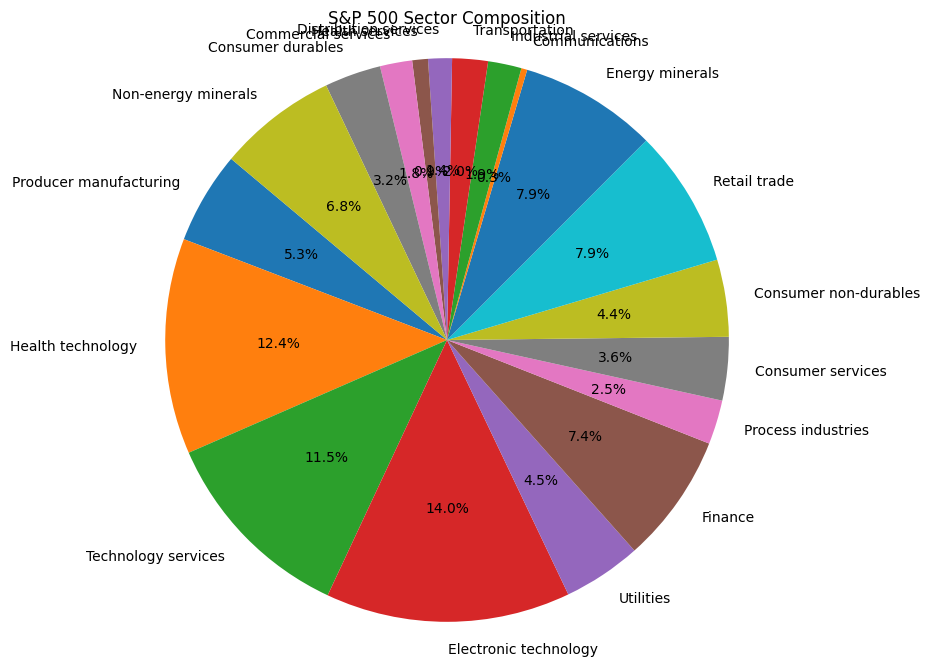

defaultdict(float,
            {'Producer manufacturing': 2645259000000.0,
             'Health technology': 6190386000000.0,
             'Technology services': 5747724000000.0,
             'Electronic technology': 7024515000000.0,
             'Utilities': 2249063000000.0,
             'Finance': 3721161000000.0,
             'Process industries': 1268244000000.0,
             'Consumer services': 1817982000000.0,
             'Consumer non-durables': 2211697000000.0,
             'Retail trade': 3957589000000.0,
             'Energy minerals': 3950747000000.0,
             'Communications': 170222000000.0,
             'Industrial services': 959883000000.0,
             'Transportation': 1023455000000.0,
             'Distribution services': 683277000000.0,
             'Health services': 450212000000.0,
             'Commercial services': 923779000000.0,
             'Consumer durables': 1617674000000.0,
             'Non-energy minerals': 3416816000000.0})

In [9]:
uf.get_index_sector_composition(source='universe',index='spy')

In [5]:
self = RiskManager(ib)

In [6]:
portfolio =self.get_portfolio_data()

In [7]:
portfolio.head()

contract  position  marketPrice  \
0  Stock(conId=14016560, symbol='6368', right='0'...     200.0  7866.000000   
1  Stock(conId=13905785, symbol='7012', right='0'...     100.0  6544.000000   
2  Stock(conId=70332154, symbol='960', right='0',...     500.0    13.364300   
3  Option(conId=726994679, symbol='AMD', lastTrad...      -1.0     0.124697   
4  Option(conId=683238380, symbol='AMD', lastTrad...      -1.0    21.615162   

   marketValue  averageCost  unrealizedPNL  realizedPNL   account symbol  \
0   1573200.00  7033.215000      166557.00          0.0  U7706434   6368   
1    654400.00  4618.480000      192552.00          0.0  U7706434   7012   
2      6682.15    10.472886        1445.71          0.0  U7706434    960   
3       -12.47   149.939700         137.47          0.0  U7706434    AMD   
4     -2161.52  2204.132600          42.62          0.0  U7706434    AMD   

                          asset_class  
0   <class 'ib_async.contract.Stock'>  
1   <class 'ib_async.contract.Stock'>  
2   <class 'ib_async.contract.Stock'>  
3  <class 'ib_async.contract.Option'>  
4  <class 'ib_async.contract.Option'>

In [25]:
lib = ac.get_library('univ')
universe = lib.read('us_equities').data
universe

Symbol                                    Name   Price Change %  \
0         A              Agilent Technologies, Inc.  144.97   +0.29%   
1        AA                       Alcoa Corporation   39.12   +2.49%   
2      AACT         Ares Acquisition Corporation II   10.84    0.00%   
3      AADI                   Aadi Bioscience, Inc.    1.94   +1.04%   
4       AAL           American Airlines Group, Inc.   11.51   +6.38%   
...     ...                                     ...     ...      ...   
4629   ZVRA                Zevra Therapeutics, Inc.    7.20   +0.28%   
4630   ZVSA              ZyVersa Therapeutics, Inc.    2.24   −0.88%   
4631    ZWS  Zurn Elkay Water Solutions Corporation   36.38   +0.69%   
4632   ZYME                          Zymeworks Inc.   12.57   +3.12%   
4633   ZYXI                             Zynex, Inc.    7.90   +0.89%   

          Volume Rel Volume    Market Cap    P/E EPS (dil TTM)  \
0      1001000.0       0.57  4.165400e+10  30.04      4.83 USD   
1      4145000.0       0.71  1.010600e+10      —     −3.08 USD   
2        24842.0       0.24  6.771880e+08  25.72      0.42 USD   
3        55050.0       0.38  4.775300e+07      —     −2.43 USD   
4     53739000.0       1.12  7.559000e+09      —     −0.28 USD   
...          ...        ...           ...    ...           ...   
4629    718964.0       0.40  3.788480e+08      —     −1.68 USD   
4630     13069.0       0.38  2.406000e+06      —    −73.92 USD   
4631   1431000.0       0.39  6.218000e+09  47.11      0.77 USD   
4632    536324.0       0.80  9.002390e+08      —     −1.52 USD   
4633     67052.0       0.69  2.507660e+08  45.56      0.17 USD   

     EPS Growth (TTM YoY) Div Yield % TTM                  Sector  \
0                 +26.54%           0.64%       Health technology   
1                 +62.20%           1.02%     Non-energy minerals   
2                       —           0.00%                 Finance   
3                  +0.34%           0.00%       Health technology   
4                −107.72%           0.00%          Transportation   
...                   ...             ...                     ...   
4629              −77.61%           0.00%       Health technology   
4630              +96.78%           0.00%       Health technology   
4631             +184.00%           0.88%  Producer manufacturing   
4632             −154.29%           0.00%       Health technology   
4633              −61.81%           0.00%       Health technology   

     Analyst Rating  
0               Buy  
1               Buy  
2                 —  
3           Neutral  
4               Buy  
...             ...  
4629     Strong buy  
4630              —  
4631            Buy  
4632            Buy  
4633     Strong buy  

[4634 rows x 13 columns]

In [22]:
for contract in portfolio['contract']:
    if isinstance(contract, Option):
        symbol = contract.symbol
        if symbol in universe['Symbol'].values:
            sector = universe.loc[universe['Symbol'] == symbol, 'Sector'].values[0]
            print(symbol, sector)

AMD Electronic technology
AMD Electronic technology
AMD Electronic technology
APLD Technology services
APOG Producer manufacturing
CALM Process industries
DAL Transportation
DPZ Consumer services
HELE Consumer durables
JPM Finance
MMYT Technology services
PLTR Technology services
PTON Consumer services


In [25]:
# Method 1: Using yfinance
info_dict = {}
for _, row in portfolio.iterrows():
    if isinstance(contract, Option):
        if np.sign(row['position']) == -1 and row['contract'].right == 'P':
            symbol = row['contract'].symbol
            info = yf.Ticker(symbol).info
            info_dict[symbol] = info

for key, value in info_dict.items():
    try:
        print(key, value['sector'])
    except:
        next

In [28]:
info_dict = {}
total_capital_at_risk = 0
cap_at_risk = np.array([])  
dte_array = np.array([])
sectors = np.array([])

for _, row in portfolio.iterrows():
    if isinstance(row['contract'], Option):
        
        if np.sign(row['position']) == -1 and row['contract'].right == 'P':
            symbol = row['contract'].symbol
            info = yf.Ticker(symbol).info
            info_dict[symbol] = info
            try:
                sector = info['sector']
                sectors = np.append(sectors, sector)
            except:
                next
            
            cap_at_risk = np.append(cap_at_risk, abs(row['position']) * float(row['contract'].strike) * int(row['contract'].multiplier))
            last_trade_date = datetime.strptime(row['contract'].lastTradeDateOrContractMonth, '%Y%m%d')
            days_to_expiry = (last_trade_date - datetime.now()).days
            dte_array = np.append(dte_array, days_to_expiry)
            total_capital_at_risk += abs(row['position']) * float(row['contract'].strike) * int(row['contract'].multiplier)

average_dte = ((dte_array * cap_at_risk) / cap_at_risk.sum()).sum()
total_capital_at_risk


468251.0

In [31]:
sectors

array(['Technology', 'Technology', 'Technology', 'Technology',
       'Industrials', 'Consumer Defensive', 'Industrials',
       'Consumer Cyclical', 'Consumer Defensive', 'Real Estate',
       'Financial Services', 'Technology', 'Consumer Cyclical'],
      dtype='<U32')

In [32]:
cap_at_risk

array([13500., 18500., 20000.,   550.,  8000.,  7000.,  9000., 38500.,
       10400., 12000.,  5000., 13000., 21500., 21100.,  4200., 21500.,
       10000.,  8500., 46500., 42334., 21500., 22167., 47500., 46000.])

In [33]:
info_dict = {}
total_capital_at_risk = 0
cap_at_risk = np.array([])  
dte_array = np.array([])
sectors = np.array([])

for _, row in portfolio.iterrows():
    if isinstance(row['contract'], Option):
        
        if np.sign(row['position']) == -1 and row['contract'].right == 'P':
            symbol = row['contract'].symbol
            info = yf.Ticker(symbol).info
            info_dict[symbol] = info
            try:
                sector = info['sector']
                sectors = np.append(sectors, sector)
                
                # Append to cap_at_risk only if sector is found
                cap_at_risk = np.append(cap_at_risk, abs(row['position']) * float(row['contract'].strike) * int(row['contract'].multiplier))
                last_trade_date = datetime.strptime(row['contract'].lastTradeDateOrContractMonth, '%Y%m%d')
                days_to_expiry = (last_trade_date - datetime.now()).days
                dte_array = np.append(dte_array, days_to_expiry)
                total_capital_at_risk += abs(row['position']) * float(row['contract'].strike) * int(row['contract'].multiplier)
            except KeyError:
                # Handle the case where 'sector' is not found
                continue

average_dte = ((dte_array * cap_at_risk) / cap_at_risk.sum()).sum()
total_capital_at_risk

180050.0

In [44]:
total_capital_at_risk * 0.01

1800.5

In [29]:
from collections import defaultdict
import matplotlib.pyplot as plt



In [39]:
# Dictionary to hold capital at risk by sector
capital_by_sector = defaultdict(float)

# Aggregate capital at risk by sector
for cap, sector in zip(cap_at_risk, sectors):
    capital_by_sector[sector] += cap

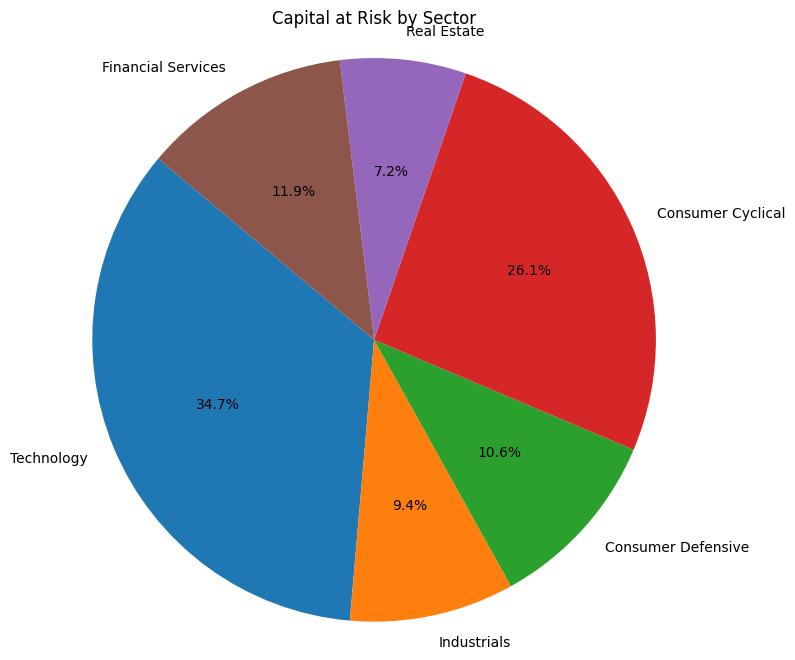

In [42]:

# Prepare data for the pie chart
labels = list(capital_by_sector.keys())
sizes = list(capital_by_sector.values())

# Plotting the pie chart
plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Capital at Risk by Sector')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

In [36]:
sectors

array(['Technology', 'Technology', 'Technology', 'Technology',
       'Industrials', 'Consumer Defensive', 'Industrials',
       'Consumer Cyclical', 'Consumer Defensive', 'Real Estate',
       'Financial Services', 'Technology', 'Consumer Cyclical'],
      dtype='<U32')

In [27]:
(dte * cap_at_risk) / cap_at_risk.sum()

array([0.34596829, 1.30378793, 2.90442519, 0.03053918, 0.08542427,
       0.49332516, 0.49973198, 2.13774236, 0.11105155, 0.84570028,
       0.05339017, 0.13881444, 0.22957773, 0.54073563, 0.04484774,
       0.55098654, 0.10678034, 0.09076329, 0.49652857, 0.45204388,
       0.22957773, 0.23669998, 6.89800983, 7.76079496])

In [8]:
universe.Symbol

0          A
1         AA
2       AACT
3       AADI
4        AAL
        ... 
2595     MCB
2596    MCBS
2597     MCD
2598    MCFT
2599    MCHP
Name: Symbol, Length: 2600, dtype: object

In [26]:
spx = pd.read_html('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')[0]
spx.head()

Symbol             Security             GICS Sector  \
0    MMM                   3M             Industrials   
1    AOS          A. O. Smith             Industrials   
2    ABT  Abbott Laboratories             Health Care   
3   ABBV               AbbVie             Health Care   
4    ACN            Accenture  Information Technology   

                GICS Sub-Industry    Headquarters Location  Date added  \
0        Industrial Conglomerates    Saint Paul, Minnesota  1957-03-04   
1               Building Products     Milwaukee, Wisconsin  2017-07-26   
2           Health Care Equipment  North Chicago, Illinois  1957-03-04   
3                   Biotechnology  North Chicago, Illinois  2012-12-31   
4  IT Consulting & Other Services          Dublin, Ireland  2011-07-06   

       CIK      Founded  
0    66740         1902  
1    91142         1916  
2     1800         1888  
3  1551152  2013 (1888)  
4  1467373         1989

In [48]:
spx_symbols = spx['Symbol'].tolist()

# Create a dictionary to store sector and market cap information
spx_sector_market_cap = {}


# Iterate over SPX symbols
number_of_stocks = 0
for symbol in spx_symbols:
    if symbol in universe['Symbol'].values:
        stock_data = universe[universe['Symbol'] == symbol].iloc[0]
        sector = stock_data['Sector']
        market_cap = stock_data['Market Cap']
        
        if sector not in spx_sector_market_cap:
            spx_sector_market_cap[sector] = 0
        spx_sector_market_cap[sector] += market_cap
        number_of_stocks += 1
    else:
        print(symbol,"not in universe")
# Calculate total market cap
total_market_cap = sum(spx_sector_market_cap.values())

# Calculate percentage for each sector
spx_sector_composition = {sector: (market_cap / total_market_cap) * 100 
                          for sector, market_cap in spx_sector_market_cap.items()}

# Sort the dictionary by percentage in descending order
spx_sector_composition = dict(sorted(spx_sector_composition.items(), key=lambda x: x[1], reverse=True))

# Print the results
for sector, percentage in spx_sector_composition.items():
    print(f"{sector}: {percentage:.2f}%")
number_of_stocks


ARE not in universe
GOOGL not in universe
AMT not in universe
AVB not in universe
BRK.B not in universe
BF.B not in universe
BXP not in universe
CPT not in universe
CCI not in universe
DLR not in universe
EQIX not in universe
EQR not in universe
ESS not in universe
EXR not in universe
FRT not in universe
FOXA not in universe
DOC not in universe
HST not in universe
INVH not in universe
IRM not in universe
KIM not in universe
MAA not in universe
NWSA not in universe
PLD not in universe
PSA not in universe
O not in universe
REG not in universe
SBAC not in universe
SPG not in universe
UDR not in universe
VTR not in universe
VICI not in universe
WELL not in universe
WY not in universe
Producer manufacturing: nan%
Health technology: nan%
Technology services: nan%
Electronic technology: nan%
Utilities: nan%
Finance: nan%
Process industries: nan%
Consumer services: nan%
Consumer non-durables: nan%
Retail trade: nan%
Energy minerals: nan%
Communications: nan%
Industrial services: nan%
Transport

469

In [45]:
universe

Symbol                                    Name   Price Change %  \
0         A              Agilent Technologies, Inc.  144.97   +0.29%   
1        AA                       Alcoa Corporation   39.12   +2.49%   
2      AACT         Ares Acquisition Corporation II   10.84    0.00%   
3      AADI                   Aadi Bioscience, Inc.    1.94   +1.04%   
4       AAL           American Airlines Group, Inc.   11.51   +6.38%   
...     ...                                     ...     ...      ...   
4629   ZVRA                Zevra Therapeutics, Inc.    7.20   +0.28%   
4630   ZVSA              ZyVersa Therapeutics, Inc.    2.24   −0.88%   
4631    ZWS  Zurn Elkay Water Solutions Corporation   36.38   +0.69%   
4632   ZYME                          Zymeworks Inc.   12.57   +3.12%   
4633   ZYXI                             Zynex, Inc.    7.90   +0.89%   

          Volume Rel Volume    Market Cap    P/E EPS (dil TTM)  \
0      1001000.0       0.57  4.165400e+10  30.04      4.83 USD   
1      4145000.0       0.71  1.010600e+10      —     −3.08 USD   
2        24842.0       0.24  6.771880e+08  25.72      0.42 USD   
3        55050.0       0.38  4.775300e+07      —     −2.43 USD   
4     53739000.0       1.12  7.559000e+09      —     −0.28 USD   
...          ...        ...           ...    ...           ...   
4629    718964.0       0.40  3.788480e+08      —     −1.68 USD   
4630     13069.0       0.38  2.406000e+06      —    −73.92 USD   
4631   1431000.0       0.39  6.218000e+09  47.11      0.77 USD   
4632    536324.0       0.80  9.002390e+08      —     −1.52 USD   
4633     67052.0       0.69  2.507660e+08  45.56      0.17 USD   

     EPS Growth (TTM YoY) Div Yield % TTM                  Sector  \
0                 +26.54%           0.64%       Health technology   
1                 +62.20%           1.02%     Non-energy minerals   
2                       —           0.00%                 Finance   
3                  +0.34%           0.00%       Health technology   
4                −107.72%           0.00%          Transportation   
...                   ...             ...                     ...   
4629              −77.61%           0.00%       Health technology   
4630              +96.78%           0.00%       Health technology   
4631             +184.00%           0.88%  Producer manufacturing   
4632             −154.29%           0.00%       Health technology   
4633              −61.81%           0.00%       Health technology   

     Analyst Rating  
0               Buy  
1               Buy  
2                 —  
3           Neutral  
4               Buy  
...             ...  
4629     Strong buy  
4630              —  
4631            Buy  
4632            Buy  
4633     Strong buy  

[4634 rows x 13 columns]

nan

In [28]:
yf.Ticker('AAPL').info

{'address1': 'One Apple Park Way',
 'city': 'Cupertino',
 'state': 'CA',
 'zip': '95014',
 'country': 'United States',
 'phone': '408 996 1010',
 'website': 'https://www.apple.com',
 'industry': 'Consumer Electronics',
 'industryKey': 'consumer-electronics',
 'industryDisp': 'Consumer Electronics',
 'sector': 'Technology',
 'sectorKey': 'technology',
 'sectorDisp': 'Technology',
 'longBusinessSummary': 'Apple Inc. designs, manufactures, and markets smartphones, personal computers, tablets, wearables, and accessories worldwide. The company offers iPhone, a line of smartphones; Mac, a line of personal computers; iPad, a line of multi-purpose tablets; and wearables, home, and accessories comprising AirPods, Apple TV, Apple Watch, Beats products, and HomePod. It also provides AppleCare support and cloud services; and operates various platforms, including the App Store that allow customers to discover and download applications and digital content, such as books, music, video, games, and pod

In [70]:
# Method 2: Using the universe
import math
info_dict = {}

sectors = np.array([])
market_caps = np.array([])

for sym in spx_symbols:
    try:
        sector = universe.loc[universe['Symbol'] == sym, 'Sector'].values[0]
        market_cap = universe.loc[universe['Symbol'] == sym, 'Market Cap'].values[0]
        if math.isnan(market_cap):
            next 
        else:
            market_caps = np.append(market_caps, market_cap)
        sectors = np.append(sectors, sector)
    except:
        next

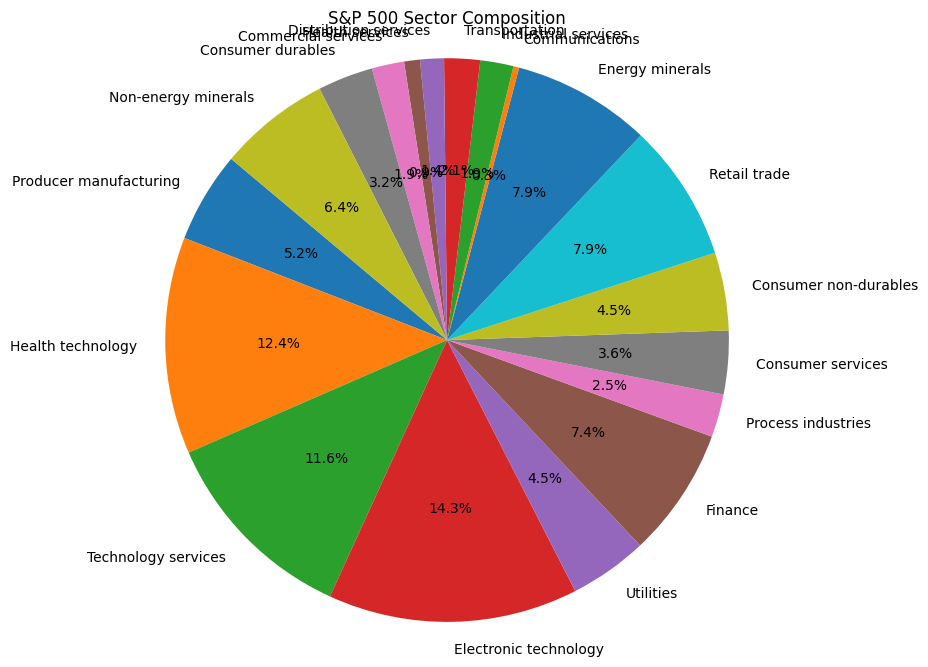

In [71]:
# Dictionary to hold capital at risk by sector
capital_by_sector = defaultdict(float)

# Aggregate capital at risk by sector
for cap, sector in zip(market_caps, sectors):
    capital_by_sector[sector] += cap

# Prepare data for the pie chart
labels = list(capital_by_sector.keys())
sizes = list(capital_by_sector.values())

# Plotting the pie chart
plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('S&P 500 Sector Composition')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

In [69]:
capital_by_sector

defaultdict(float,
            {'Producer manufacturing': 1862117000000.0,
             'Health technology': 4505664000000.0,
             'Technology services': nan,
             'Electronic technology': 10705784000000.0,
             'Utilities': 1277185000000.0,
             'Finance': 4540250000000.0,
             'Process industries': 857772000000.0,
             'Consumer services': 1577406000000.0,
             'Consumer non-durables': 2147438000000.0,
             'Retail trade': 4321243000000.0,
             'Energy minerals': 1444380000000.0,
             'Communications': 586095000000.0,
             'Industrial services': 489869000000.0,
             'Transportation': 758060000000.0,
             'Distribution services': 302970000000.0,
             'Health services': 1058271000000.0,
             'Commercial services': 1458715000000.0,
             'Consumer durables': 1111714000000.0,
             'Non-energy minerals': 253479000000.0})

In [30]:
info_dict = {}

sectors = np.array([])
market_caps = np.array([])

for sym in spx_symbols:
    info = yf.Ticker(sym).info
    info_dict[sym] = info
    try:
        sector = info['sector']
        sectors = np.append(sectors, sector)
        market_cap = info['marketCap']
        market_caps = np.append(market_caps, market_cap)
    except:
        next

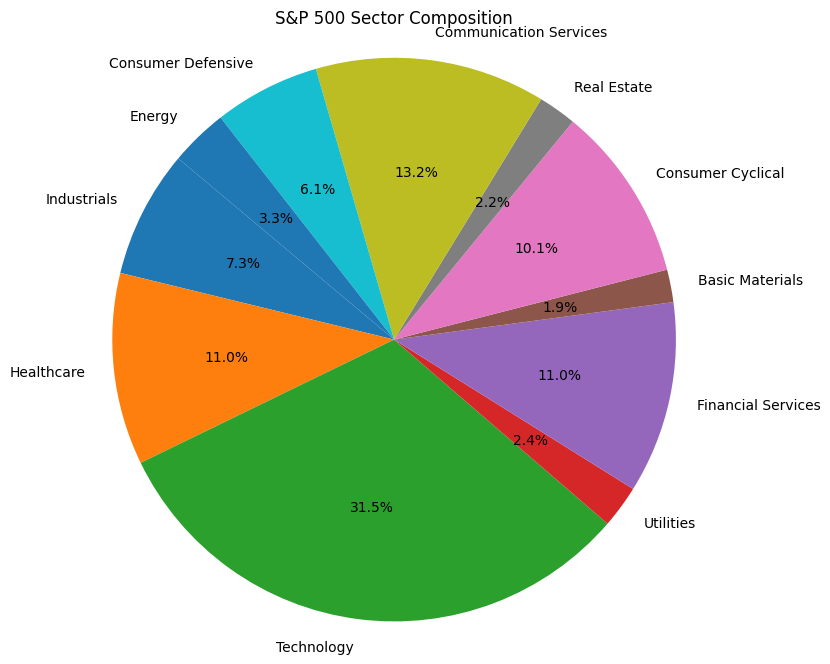

In [32]:
# Dictionary to hold capital at risk by sector
capital_by_sector = defaultdict(float)

# Aggregate capital at risk by sector
for cap, sector in zip(market_caps, sectors):
    capital_by_sector[sector] += cap

# Prepare data for the pie chart
labels = list(capital_by_sector.keys())
sizes = list(capital_by_sector.values())

# Plotting the pie chart
plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('S&P 500 Sector Composition')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

In [42]:
capital_by_sector

defaultdict(float,
            {'Industrials': 3882055473664.0,
             'Healthcare': 5848410488832.0,
             'Technology': 16717895661568.0,
             'Utilities': 1293356611584.0,
             'Financial Services': 5852289300480.0,
             'Basic Materials': 992267961856.0,
             'Consumer Cyclical': 5352752757248.0,
             'Real Estate': 1165294669824.0,
             'Communication Services': 7021231818240.0,
             'Consumer Defensive': 3231785527296.0,
             'Energy': 1767761492992.0})

In [41]:

from yahooquery import Ticker
from concurrent.futures import ThreadPoolExecutor

sectors = np.array([])
market_caps = np.array([])

def retrieve_data(ticker):
    info = Ticker(ticker)
    mkt_cap = info.price[ticker].get('marketCap')
    sector = info.summary_profile[ticker].get('sector')
    
    sectors = np.append(sectors, sector)
    market_caps = np.append(market_caps, mkt_cap)
    #print(f"{ticker} {info.get('regularMarketPrice')} {info.get('marketCap')}")

with ThreadPoolExecutor() as executor:
    executor.map(retrieve_data, spx_symbols)

Failed to obtain crumb.  Ability to retrieve data will be significantly limited.
Failed to obtain crumb.  Ability to retrieve data will be significantly limited.
Failed to obtain crumb.  Ability to retrieve data will be significantly limited.
Failed to obtain crumb.  Ability to retrieve data will be significantly limited.
Failed to obtain crumb.  Ability to retrieve data will be significantly limited.
Failed to obtain crumb.  Ability to retrieve data will be significantly limited.
Failed to obtain crumb.  Ability to retrieve data will be significantly limited.
Failed to obtain crumb.  Ability to retrieve data will be significantly limited.
Failed to obtain crumb.  Ability to retrieve data will be significantly limited.
Failed to obtain crumb.  Ability to retrieve data will be significantly limited.
Failed to obtain crumb.  Ability to retrieve data will be significantly limited.
Failed to obtain crumb.  Ability to retrieve data will be significantly limited.
Failed to obtain crumb.  Abi

KeyboardInterrupt: 

Failed to obtain crumb.  Ability to retrieve data will be significantly limited.


In [ ]:
# Dictionary to hold Market Cap by sector
mktcap_by_sector = defaultdict(float)

# Aggregate capital at risk by sector
for cap, sector in zip(market_caps, sectors):
    mktcap_by_sector[sector] += cap

# Prepare data for the pie chart
labels = list(mktcap_by_sector.keys())
sizes = list(mktcap_by_sector.values())

# Plotting the pie chart
plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('S&P 500 Sector Composition')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

In [55]:
# Calculate the sum of all percentage values
total_percentage = sum(spx_sector_composition.values())

print(f"The sum of all sector percentages is: {total_percentage:.2f}%")


The sum of all sector percentages is: 100.00%


In [50]:
universe[universe['Symbol']=='AAPL']

Symbol        Name       Price Change %    Volume Rel Volume   Market cap  \
12   AAPL  Apple Inc.  220.82 USD   −0.70%  48.403 M       1.15  3.357 T USD   

      P/E EPS dil\nTTM EPS dil growth\nTTM YoY Div yield %\nTTM  \
12  33.62     6.57 USD                 +10.38%            0.44%   

                   Sector Analyst Rating  
12  Electronic technology            Buy

In [47]:
spx['GICS Sector'].value_counts()

GICS Sector
Industrials               78
Financials                72
Information Technology    69
Health Care               62
Consumer Discretionary    50
Consumer Staples          38
Utilities                 31
Real Estate               31
Materials                 28
Communication Services    22
Energy                    22
Name: count, dtype: int64

In [48]:
sectors.tolist()

['Technology',
 'Technology',
 'Technology',
 'Technology',
 'Industrials',
 'Consumer Defensive',
 'Industrials',
 'Consumer Cyclical',
 'Consumer Defensive',
 'Real Estate',
 'Financial Services',
 'Technology',
 'Consumer Cyclical']